In [1]:
import json
import numpy as np

Load the CIFAR-10 structures testing accuracy, valid accuracy, parameter sizes.

In [2]:
with open('../data/all_structure_accuracy.json') as tt:
    structure = json.load(tt)
structure_dict = {}
for s,acc in structure:
    structure_dict[str(s)] = acc
with open('../data/all_structure_valid_accuracy.json') as tt:
    structure = json.load(tt)
structure_dict_valid = {}
for s,acc in structure:
    structure_dict_valid[str(s)] = acc
with open('../data/all_structure_params.json') as tt:
    structure = json.load(tt)
params_dict = {}
for s,acc in structure:
    params_dict[str(s)] = acc

In [75]:
accs = []
for i in structure_dict_valid:
    accs.append(structure_dict_valid[i])

In [76]:
accs = np.asarray(accs)

In [77]:
accs.sort()

In [93]:
np.mean(accs[12500:])

89.80349460528281

In [89]:
15625*80/100

12500.0

Some functions.

In [3]:
NAS_BENCH_201         = ['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']
def generate_arch(structure):
    NAS_BENCH_201 = ['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']
    strings = []
    for i in range(3):
        
        string = '|'.join([NAS_BENCH_201[structure[i][k]]+'~{:}'.format(k) for k in range(i+1)])
        string = '|{:}|'.format(string)
        strings.append( string )
    return '+'.join(strings)

Selection.

In [99]:
names = ['record_cifar10_17_16_80000_0_256_64_4_1_50_0.5_0.0_']
steps = [50]
max_params = 1.5315459999999999
alpha = 1.4
# alpha = 0
beta = 5.2
T = 10000
Total = 80000
randids = ['111','222','333','444','555']
for name,st in zip(names,steps):
    corr = []
    params_loss_sets = []
    for randid in randids:
        estimat_dict = {}
        params_loss_set = []
        for idxxx in range((Total-T)//st,Total//st):
            with open('./'+name+randid+ '/%06d-ep.txt'%((idxxx+1)*st),'r') as tt:
                history = json.load(tt)
            sorted_history = sorted(history,key=lambda x: \
                              x[1] if x[2] >= 1 else 100, reverse=False)
            
            
            for structure,loss,count in sorted_history[:1]:
                arch = generate_arch(structure)
                cos = params_dict[str(structure)]
                if arch not in estimat_dict:
                    estimat_dict[arch] = \
                {'loss_set':[loss],'count':1,'number_rep':structure,'params':cos}
                else:
                    if estimat_dict[arch]['loss_set'][-1] != loss:
                        estimat_dict[arch]['loss_set'].append(loss)
                        estimat_dict[arch]['count'] += 1
        
        final_acc_set = []
        for arch in estimat_dict:
            if estimat_dict[arch]['count'] >= 1:
                loss = estimat_dict[arch]['loss_set'][-1]
                loss = loss + alpha * np.exp(-beta * estimat_dict[arch]['params']/max_params) 
                final_acc_set.append([loss,estimat_dict[arch]['number_rep']])
                params_loss_set.append([estimat_dict[arch]['params'],loss,estimat_dict[arch]['number_rep']])
        params_loss_set.sort()
        params_loss_sets.append(params_loss_set)
        final_acc_set.sort()
        new_accuracy_set = []
    
    top_acc1s_valid = []
    top_acc1s = []
    for k,randid in enumerate(randids):
        top_acc1 = []
        lowest_p = 100
        bests = []
        best_pareto = 0
        for indx,params in enumerate(params_loss_sets[k]):
            if params[1] <= lowest_p:
                lowest_p = params[1] 
                bests.append(params)
        new_acc_valid = structure_dict_valid[str(bests[-1][2])]
        new_acc = structure_dict[str(bests[-1][2])]
        top_acc1s_valid.append(new_acc_valid)
        top_acc1s.append(new_acc)
    print('Valid accuracy:',top_acc1s_valid)
    print('Test accuracy:',top_acc1s)

Valid accuracy: [91.5533333235677, 90.97999999267579, 91.33599998535156, 91.60666665039064, 91.17999998046875]
Test accuracy: [94.36333333333334, 93.48, 94.08, 94.37333333333333, 93.7]


In [101]:
np.mean(top_acc1s_valid)

91.3311999864909

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [22]:
all_params = np.asarray(params_loss_sets[0])

Text(0, 0.5, 'loss')

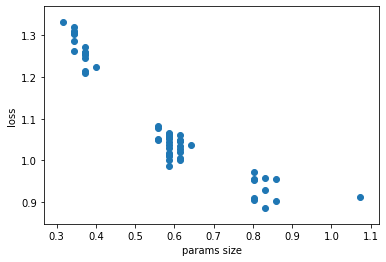

In [23]:
plt.scatter(all_params[:,0],all_params[:,1])
plt.xlabel('params size')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

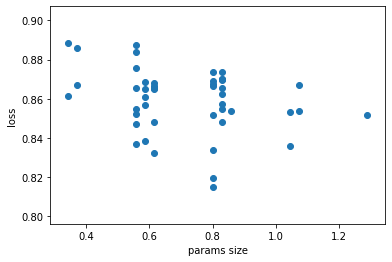

In [17]:
plt.scatter(all_params[:,0],all_params[:,1])

plt.xlabel('params size')
plt.ylabel('loss')

In [18]:
all_params

array([[0.344346, 0.8611844182014465, list([[0], [2, 1], [1, 0, 3]])],
       [0.344346, 0.8883010745048523, list([[2], [1, 4], [1, 0, 3]])],
       [0.372346, 0.8672560453414917, list([[2], [3, 0], [1, 4, 2]])],
       [0.372346, 0.8860267996788025, list([[0], [3, 2], [1, 0, 2]])],
       [0.559386, 0.836763858795166, list([[0], [3, 0], [1, 0, 3]])],
       [0.559386, 0.8470867872238159, list([[3], [1, 4], [1, 3, 0]])],
       [0.559386, 0.8524892926216125, list([[0], [3, 0], [1, 1, 3]])],
       [0.559386, 0.8547875285148621, list([[3], [1, 1], [0, 3, 1]])],
       [0.559386, 0.8656993508338928, list([[3], [0, 1], [1, 3, 4]])],
       [0.559386, 0.875960111618042, list([[3], [1, 1], [1, 1, 3]])],
       [0.559386, 0.8840680122375488, list([[1], [3, 0], [1, 0, 3]])],
       [0.559386, 0.88724684715271, list([[4], [3, 1], [1, 0, 3]])],
       [0.587386, 0.8386846780776978, list([[3], [2, 0], [1, 1, 3]])],
       [0.587386, 0.8567502498626709, list([[1], [3, 2], [0, 1, 3]])],
       [0.

In [26]:
flat_list = [item for sublist in [[3], [1, 3], [1, 2, 3]] for item in sublist]
flat_list

[3, 1, 3, 1, 2, 3]

In [27]:
import torch

In [36]:
a = torch.rand(2,5)

In [33]:
a[1][:] = torch.tensor(flat_list)

RuntimeError: The expanded size of the tensor (5) must match the existing size (6) at non-singleton dimension 0.  Target sizes: [5].  Tensor sizes: [6]

In [47]:
a[:,a[0] > 0.5]

tensor([[0.5183, 0.7542],
        [0.3468, 0.6748]])

In [45]:
a[0] > 0.5

tensor([False, False,  True,  True, False])

In [49]:
int(a[0].argmin())

0

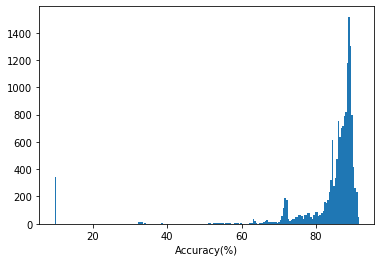

In [107]:
plt.hist(accs,200)
plt.xlabel('Accuracy(%)')
plt.savefig('nashist.pdf')